In [26]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
%matplotlib inline
import plotly.graph_objects as go
import folium
import plotly.express as px
import pandas as pd
import re

In [27]:
df = pd.read_csv("C:\My Files\Document\Coding\Datasheet\germany-wind-energy.csv")

In [28]:
df.head()

,utc_timestamp,wind_generation_actual,wind_capacity,temperature
0,2017-01-01 00:00:00+00:00,291760.0,37149.130,-2.117
1,2017-01-02 00:00:00+00:00,295097.0,37152.125,-1.154
2,2017-01-03 00:00:00+00:00,666170.0,37155.208,-0.239
3,2017-01-04 00:00:00+00:00,686581.0,37160.125,0.620
4,2017-01-05 00:00:00+00:00,261759.0,37163.542,-3.908


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   utc_timestamp           1094 non-null   object 
 1   wind_generation_actual  1094 non-null   float64
 2   wind_capacity           1094 non-null   float64
 3   temperature             1094 non-null   float64
dtypes: float64(3), object(1)
memory usage: 34.3+ KB


In [30]:
df.isna().sum()

utc_timestamp             0
wind_generation_actual    0
wind_capacity             0
temperature               0
dtype: int64

In [31]:
df.describe()

,wind_generation_actual,wind_capacity,temperature
count,1094.000000,1094.000000,1094.000000
mean,305819.767824,45066.022789,10.050167
std,205728.857915,4315.838061,7.739158
min,16482.000000,37149.130000,-9.363000
25%,148552.750000,41447.937500,3.577250
50%,254332.500000,46073.000000,10.046500
75%,412570.500000,49203.000000,16.566000
max,998899.000000,50452.000000,28.241000


In [32]:
df['utc_timestamp']=pd.to_datetime(df['utc_timestamp']).dt.tz_localize(None)

In [33]:
px.line(df,x='utc_timestamp',y="wind_generation_actual")

- The daily wind generation from 2017-2019 is stable on average every month.
- High winds always occur in the winter season in December or January, and the highest wind generator is on 8 December 2018.
- The less daily wind generation occurs during the summer season in July. 
- However, it was recorded that the daily wind generation occurred on September 22, 2017, which means the weather at that time was not normal.

In [34]:
px.line(df,x='utc_timestamp',y="wind_capacity")

- Wind capacity has increased throughout 2017-2019
- The increase of wind capacity since january 2019 is not too significant.

In [35]:
px.line(df,x='utc_timestamp',y="temperature")


- At winter season less temperature but summer season high temperature
- The highest temperature every year always increases throughout 2017-2019

In [36]:
px.scatter_3d(df, x="wind_generation_actual",y="wind_capacity",z="temperature",title ="3D Visualization")

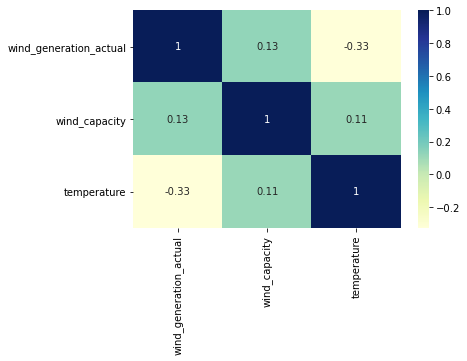

In [37]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

 - Between each of the data variables there is no high correlation, but temperature and wind generation are negatively correlated